# Notebook para realização da EDA (Análise Exploratória dos Dados)

## Carregar libs necessárias

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

## Carregar a base de dados

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/vinicius-mattoso/churn_project/main/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
# Remover a coluna do ID que não adianta para muita coisa
df.drop(columns=['customerID'],inplace=True)

In [44]:
# primeiras informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Análise quantitativa dos dados

In [45]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [46]:
df['TotalCharges'].unique

<bound method Series.unique of 0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object>

In [47]:
# Assuming 'df' is your DataFrame and 'column_name' is the column you want to convert
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [48]:
column_data_types_list = [(column, dtype) for column, dtype in df.dtypes.items()]

for i in column_data_types_list:
    if i[1] == 'object':
        print(30*'@')
        print(df[str(i[0])].value_counts())

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
gender
Male      3555
Female    3488
Name: count, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Partner
No     3641
Yes    3402
Name: count, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
DeviceProte

In [49]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [50]:
df.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [51]:
# fazendo uma alteração global de No e YES
# df.replace({'No': 1, 'Yes': 0}, inplace=True)

In [52]:
column_data_types_list = [(column, dtype) for column, dtype in df.dtypes.items()]

for i in column_data_types_list:
    if i[1] == 'object':
        print(30*'@')
        print(df[str(i[0])].value_counts())

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
gender
Male      3555
Female    3488
Name: count, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Partner
No     3641
Yes    3402
Name: count, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
DeviceProte

In [53]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [54]:
column_data_types_list = [(column, dtype) for column, dtype in df.dtypes.items()]

for i in column_data_types_list:
    if i[1] == 'object':
        print(30*'@')
        print(i)

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('gender', dtype('O'))
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('Partner', dtype('O'))
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('Dependents', dtype('O'))
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('PhoneService', dtype('O'))
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('MultipleLines', dtype('O'))
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('InternetService', dtype('O'))
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('OnlineSecurity', dtype('O'))
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('OnlineBackup', dtype('O'))
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('DeviceProtection', dtype('O'))
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('TechSupport', dtype('O'))
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('StreamingTV', dtype('O'))
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('StreamingMovies', dtype('O'))
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('Contract', dtype('O'))
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('PaperlessBilling', dtype('O'))
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('PaymentMethod', dtype('O'))
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('Churn', dtype('O'))


In [55]:
le = LabelEncoder()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [57]:
column_data_types_list = [(column, dtype) for column, dtype in df.dtypes.items()]

for i in column_data_types_list:
    if i[1] == 'object':
        print(30*'@')
        df[str(i[0])] = le.fit_transform(df[str(i[0])])
        print(f'ajustado: {i[0]} ')

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
ajustado: gender 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
ajustado: Partner 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
ajustado: Dependents 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
ajustado: PhoneService 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
ajustado: MultipleLines 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
ajustado: InternetService 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
ajustado: OnlineSecurity 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
ajustado: OnlineBackup 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
ajustado: DeviceProtection 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
ajustado: TechSupport 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
ajustado: StreamingTV 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
ajustado: StreamingMovies 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
ajustado: Contract 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
ajustado: PaperlessBilling 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
ajustado: PaymentMethod 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
ajustado: Churn 


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


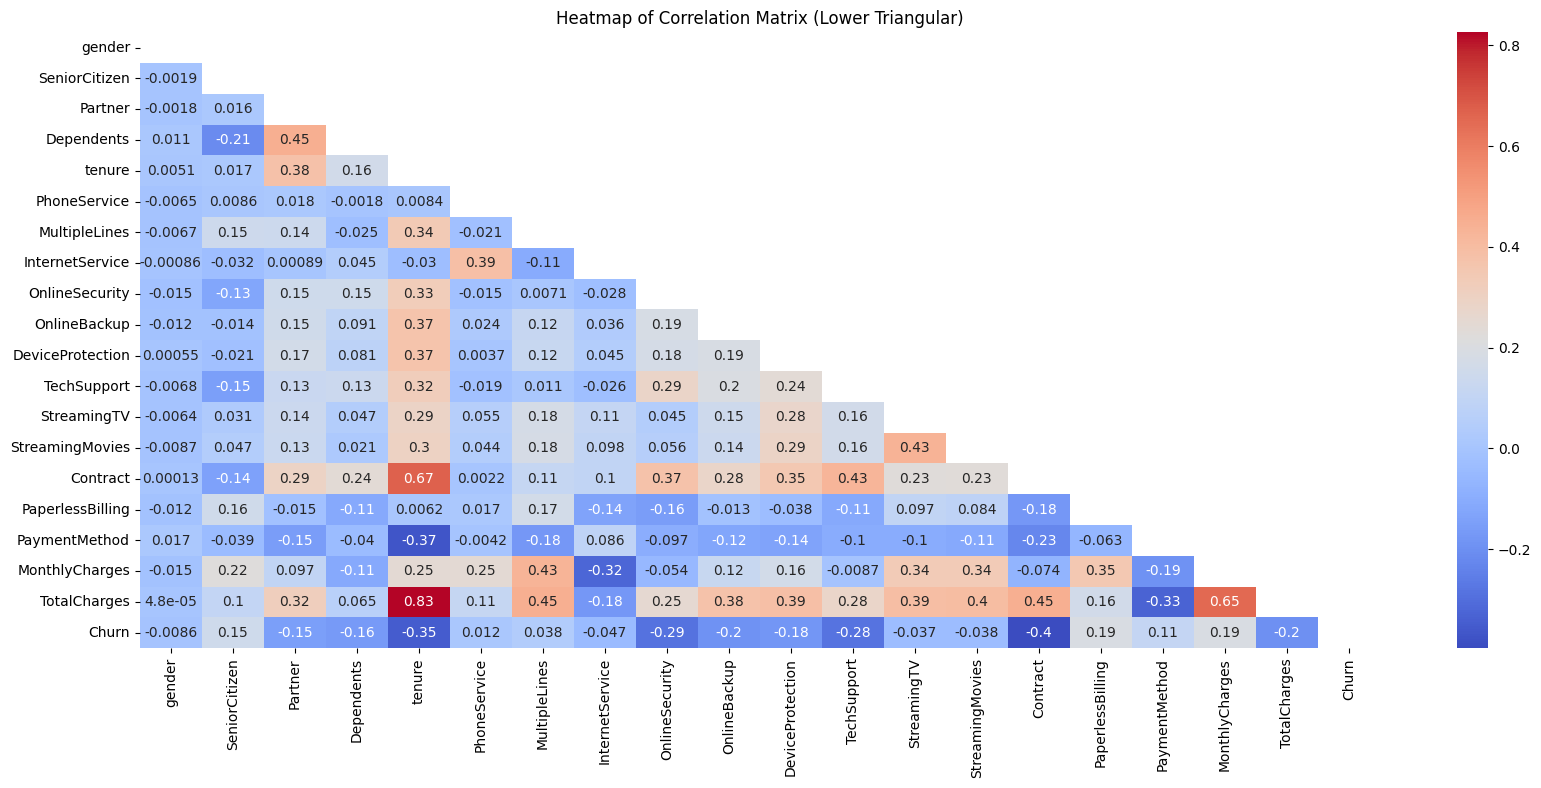

In [60]:
# Gerar a matriz de correlação entre os dados
corr_matrix = df.corr()

# Criando uma máscara para fazer triangular (including diagonal)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20, 8))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Heatmap of Correlation Matrix (Lower Triangular)')
plt.show()